In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [2]:
# Read Excel file
df = pd.read_csv('Turnover.csv')

In [3]:
df.head()

,satisfaction,evaluation,projects,hours,tenure,accident,left,promotion,department,salary
0,8.5,6.4,4,238,2,no,no,no,technical,low
1,8.5,8.9,6,145,2,yes,no,no,mktg_sales,low
2,2.4,6.7,5,254,4,no,no,no,management,high
3,2.0,9.4,5,274,3,no,yes,no,product_rand,low
4,9.8,8.8,5,236,2,no,no,no,product_rand,low


In [6]:
df.describe()

,satisfaction,evaluation,projects,hours,tenure
count,13000.000000,13000.000000,13000.000000,13000.000000,13000.000000
mean,6.526023,7.148800,3.805615,200.939769,2.501769
std,2.238893,1.712046,1.476273,50.009637,1.459981
min,1.800000,3.600000,1.000000,91.000000,1.000000
25%,5.000000,5.600000,3.000000,156.000000,2.000000
50%,6.800000,7.200000,4.000000,200.000000,2.000000
75%,8.400000,8.700000,5.000000,245.000000,3.000000
max,10.000000,10.000000,8.000000,315.000000,9.000000


In [7]:
df.dtypes

satisfaction    float64
evaluation      float64
projects          int64
hours             int64
tenure            int64
accident         object
left             object
promotion        object
department       object
salary           object
dtype: object

### Data Preprocessing

In [8]:
# feature engineering
def binary_map(feature):
    return feature.map({'yes':1, 'no':0})

binary_list = ['accident', 'left', 'promotion']
df[binary_list] = df[binary_list].apply(binary_map)

# one-hot encoding of features with more than two categories
df = pd.get_dummies(df, drop_first=False)

In [17]:
def cor(c1,c2):
    correlation=df[c1].corr(df[c2])
    print(correlation)
    plt.plot(df[c1], df[c2], 'o', color='blue')
    plt.xlabel(c1)
    plt.ylabel(c2)
    plt.show()
    return correlation
    
def group_plot(dep,ind):
    # copy of dataframe only including rows where dependent variable is True
    df_gr = df[df[dep] == 1]
    # new dataframe grouped by independent variable 
    gr_by_category = df_gr.groupby(ind)[dep].count()
    gr_by_category.plot(kind='bar')
    plt.title(f"Number of {dep} by category")
    plt.xlabel(ind)
    plt.ylabel(f"Number of {dep}")
    plt.show()
    return gr_by_category

#### 8a) How many employees have left?

In [43]:
df[df['left'] == 1].shape[0]

3112

#### 8b) What is the relationship between projects and employees leaving? 


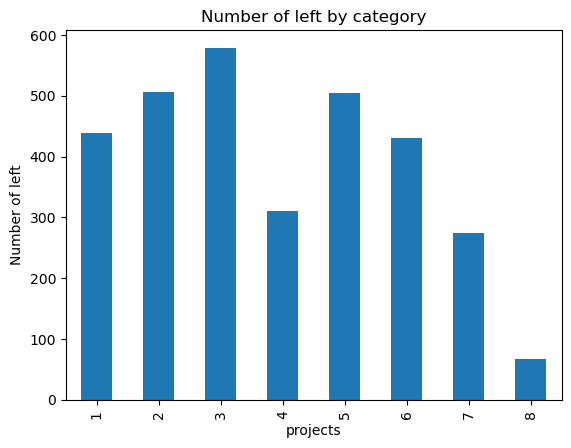

projects
1    439
2    506
3    579
4    310
5    505
6    430
7    275
8     68
Name: left, dtype: int64

In [18]:
group_plot('left', 'projects')

The lower the number of projects, the higher the number of people that leave the company. The number of projects 4 and 8 are associated with the lowest churn.

#### 8c) Are employees that received a promotion more or less likely to leave?  

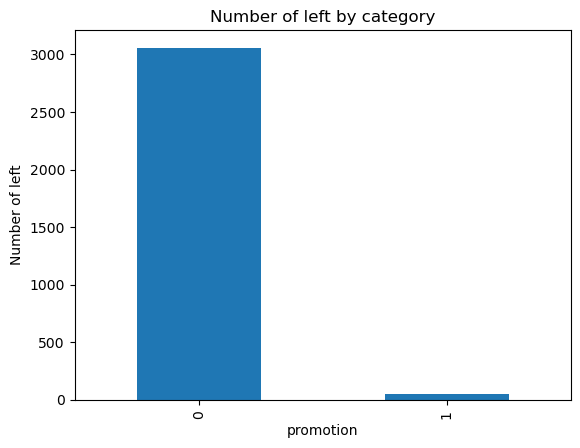

promotion
0    3057
1      55
Name: left, dtype: int64

In [19]:
group_plot('left', 'promotion')

Employees that received a promotion are less likely to leave

#### 8d) Which departments show the highest employee turnover? 

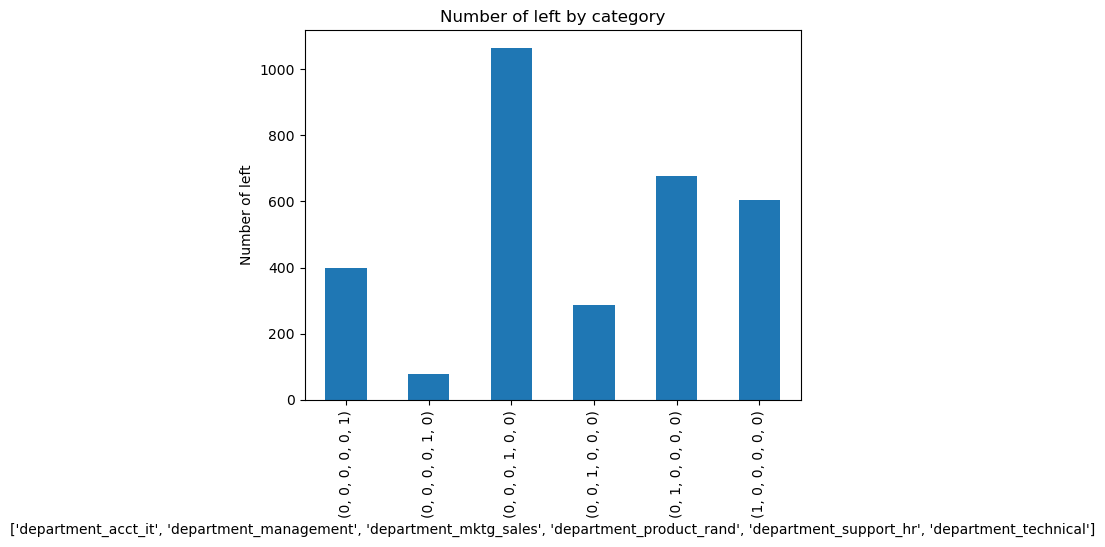

In [41]:
departments = ['department_acct_it', 'department_management','department_mktg_sales', 
 'department_product_rand', 'department_support_hr', 
 'department_technical']

tmp = group_plot('left', departments)

In [40]:
# total employees
T = len(df)
# odds of leaving the company
for d in departments:
    print(f' Odds of employees leaving that work in {d}: ', (df[df[d] == 1].shape[0] / df[df[d] == 0].shape[0]))

 Odds of employees leaving that work in department_acct_it:  0.21836925960637302
 Odds of employees leaving that work in department_management:  0.24987981924814923
 Odds of employees leaving that work in department_mktg_sales:  0.12622368535042883
 Odds of employees leaving that work in department_product_rand:  0.5009814109225262
 Odds of employees leaving that work in department_support_hr:  0.04434447300771208
 Odds of employees leaving that work in department_technical:  0.152788862286069


At first glance employees working in product_rand are most likely to leave the company, followed by support_hr and technical. However, examining the odds of people leaving it's obvious that department is not indicative of employees leaving.